## EXPLORING TIK TOK ANALYTICS

In [1]:
from os.path import exists

data_dir = 'utility/data'

assert exists(f'{data_dir}/tiktok_data.csv'), 'Loan data file is missing.'

In [2]:
import pandas as pd

data = pd.read_csv(f'{data_dir}/tiktok_data.csv')
df = data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from utility.util import configure_plots
# configure_plots()
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib.patches import Patch

The following is data of @washu Tik Tok Analytics from 1/3/24 to 5/30/24:

In [4]:
data.head(10)

,ID,Date,Day of week,Time of day,Platform,Video or Image?,Views (in thousands),Likes,Comments,Shares,...,Video Duration (s),Avg View Time (s),New Followers,Aged 18-24 %,25-34 %,35-44 %,45-54 %,55+ %,New Viewers %,Non Followers %
0,1,1/3/2024,Wednesday,12:46,TikTok,Image,19.2,1500,23,31,...,NaN,NaN,68,0.70,0.18,0.05,0.05,0.02,0.46,0.81
1,2,1/23/2024,Tuesday,10:14,TikTok,Video,7.8,410,8,40,...,101.0,16.8,10,0.72,0.17,0.04,0.05,0.02,0.29,0.61
2,3,1/31/2024,Wednesday,13:21,TikTok,Video,6.2,397,1,2,...,10.0,5.0,7,0.71,0.17,0.05,0.05,0.02,0.35,0.65
3,4,2/2/2024,Friday,11:47,TikTok,Video,4.5,261,3,10,...,20.0,6.3,4,0.68,0.18,0.05,0.06,0.02,0.32,0.60
4,5,2/5/2024,Monday,11:24,TikTok,Image,3.9,151,1,12,...,NaN,NaN,3,0.71,0.17,0.05,0.04,0.02,0.39,0.69
5,6,2/6/2024,Tuesday,10:50,TikTok,Video,16.1,1600,18,19,...,16.0,9.4,8,0.76,0.17,0.03,0.03,0.02,0.53,0.80
6,7,2/7/2024,Wednesday,13:19,TikTok,Video,65.4,15800,126,491,...,15.5,9.2,58,0.80,0.16,0.02,0.01,0.02,0.80,0.95
7,8,2/8/2024,Thursday,14:17,TikTok,Video,"1,400.0",218500,137,838,...,5.0,8.4,531,0.77,0.17,0.03,0.02,0.02,0.90,1.00
8,9,2/9/2024,Friday,12:42,TikTok,Video,5.2,281,4,30,...,57.0,9.8,4,0.67,0.19,0.05,0.06,0.02,0.29,0.57
9,10,2/13/2024,Tuesday,9:49,TikTok,Video,6.7,451,2,46,...,76.0,13.7,2,0.67,0.19,0.05,0.06,0.02,0.25,0.60


And the following are the list of features the tiktoks will be analyzed based on:

In [5]:
print(data.columns)

Index(['ID', 'Date', 'Day of week', 'Time of day', 'Platform',
       'Video or Image?', 'Views (in thousands)', 'Likes', 'Comments',
       'Shares', 'Saves/Bookmarks', 'Keywords', 'Hashtags', 'Mentions',
       'Food Tok', 'Dorm Tok', 'Beauty', 'Original Aud', 'Male Viewers',
       'Female Viewers', 'Video Duration (s)', 'Avg View Time (s)',
       'New Followers', 'Aged 18-24 %', '25-34 %', '35-44 % ', '45-54 %',
       '55+ %', 'New Viewers %', 'Non Followers %'],
      dtype='object')


## I) Analyzing Individual Features over Time

### 1) WashU Views v.s. Time

The following is a scatterplot of the views WashU Recieved over time:

In [6]:
df['Views (in thousands)'] = df['Views (in thousands)'].str.replace(',', '')

# Convert 'Views (in thousands)' column to float
df['Views (in thousands)'] = df['Views (in thousands)'].astype(float)

# Multiply 'Views (in thousands)' column by 1000
df['Views (in thousands)'] *= 1000

# Rename 'Views (in thousands)' column to 'Views'
df.rename(columns={'Views (in thousands)': 'Views'}, inplace=True)

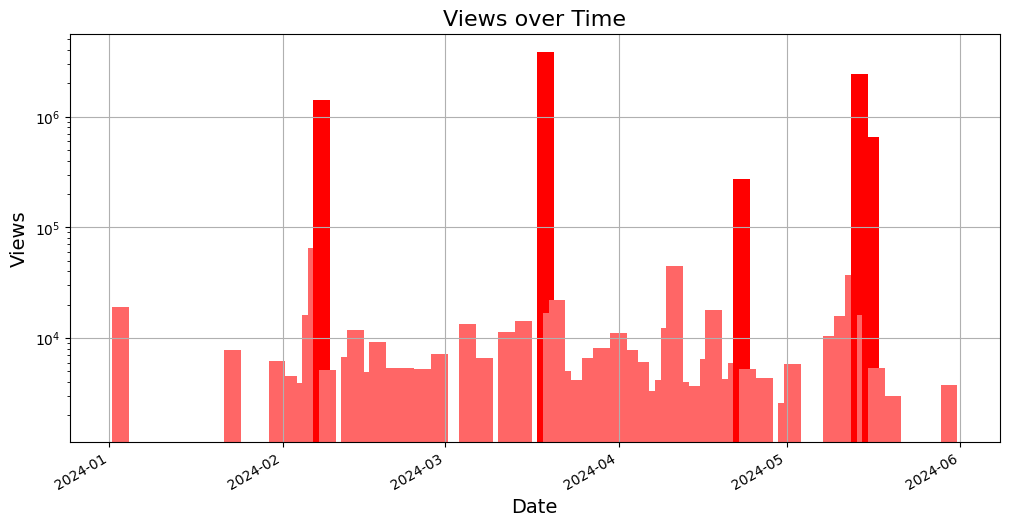

In [7]:
# Convert 'Views (in thousands)' column to int64
# df['Views (in thousands)'] = df['Views (in thousands)'].astype('int64')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

colors = ['#FF6666' if views < 10**5 else '#FF0000' for views in df['Views']]

# bar graph
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
plt.bar(df['Date'], df['Views'], width=3, color=colors) 
# formatting
plt.title('Views over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.grid(True)
# Rotate date labels for better readability
plt.gcf().autofmt_xdate()
# Log scale the y-axis
plt.yscale('log')
# Show plot
plt.show()

In this bar chart, there are 5 instances where views exceed 100,000. These spikes will be looked into further into this project

Average Views: 123925.67567567568


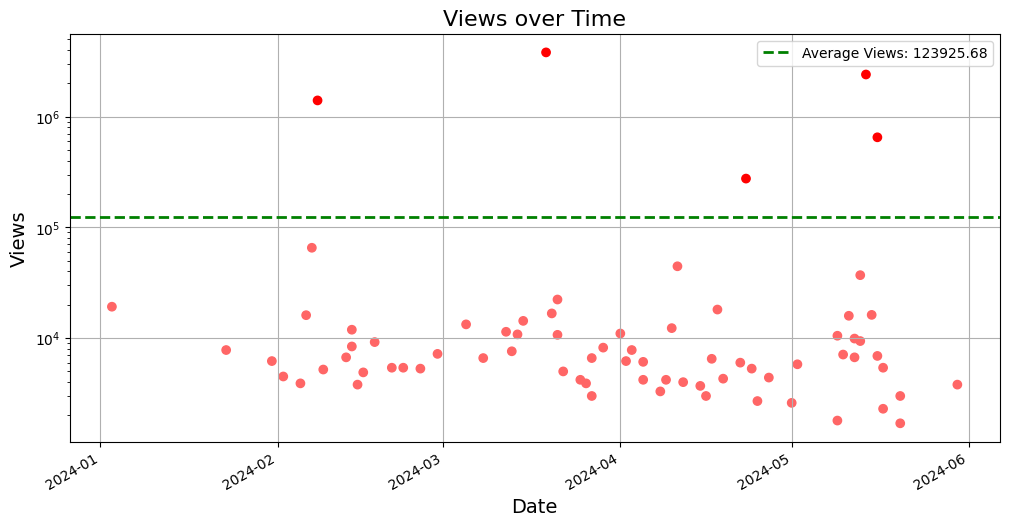

In [8]:
# scatter plot
plt.figure(figsize=(12, 6))  # Increase figure size for better readability
plt.scatter(df['Date'], df['Views'], color = colors)

# Calculate the average views
average_views = df['Views'].mean()
print("Average Views:", average_views)


# formatting
plt.title('Views over Time', fontsize=16)

plt.axhline(y=average_views, color='green', linestyle='--', linewidth=2, label=f'Average Views: {average_views:.2f}')


plt.xlabel('Date', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.grid(True)
# Rotate date labels for better readability
plt.gcf().autofmt_xdate()
# Log scale the y-axis
plt.yscale('log')
plt.legend()
plt.show()

In this scatter plot, there lies a green line which represents the overall average views, which perfectly splits the 5 spikes from the rest of the data. These however to appear more like outliers. 
Let's take a closer look at the views data & outliers with a box plot:

Average Views: 123925.67567567568


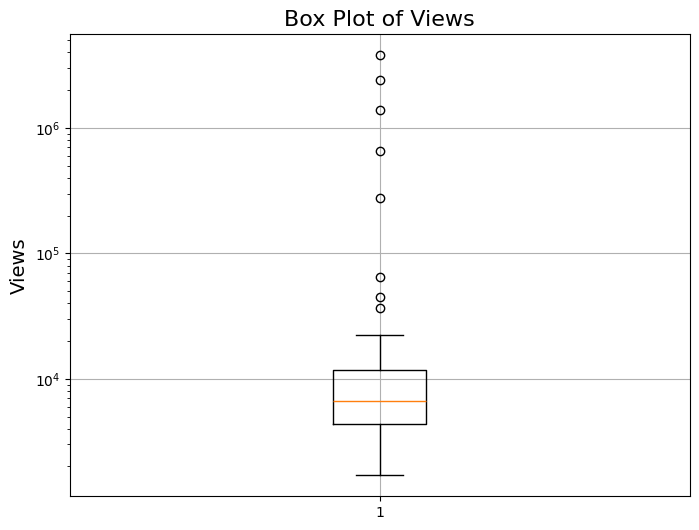

count    7.400000e+01
mean     1.239257e+05
std      5.431393e+05
min      1.700000e+03
25%      4.325000e+03
50%      6.650000e+03
75%      1.177500e+04
max      3.800000e+06
Name: Views, dtype: float64


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Calculate the average views
average_views = df['Views'].mean()
print("Average Views:", average_views)

# Create a box plot for the 'Views' column
plt.figure(figsize=(8, 6))  # Set figure size
plt.boxplot(df['Views'])

# Formatting
plt.title('Box Plot of Views', fontsize=16)
plt.ylabel('Views', fontsize=14)
plt.grid(True)
plt.yscale('log')
# Show plot
plt.show()

desc_stats = df['Views'].describe()
print(desc_stats)

What the box plot is telling us is that there are roughly 9 outliers in our data (spikes). The numbers that exceed [Q3 + 1.5 IQR] are considered outliers. so in this case, [1.177500e+04 + 1.5(1.177500e+04 - 4.225000e+03)] = 19,325 Views are considered so high compared to the rest of our data that they are written as outliers.

In [10]:
threshold = 19325

outliers = df['Views'] > threshold
normaldata = df['Views'] <= threshold

df[outliers].head(9)


,ID,Date,Day of week,Time of day,Platform,Video or Image?,Views,Likes,Comments,Shares,...,Video Duration (s),Avg View Time (s),New Followers,Aged 18-24 %,25-34 %,35-44 %,45-54 %,55+ %,New Viewers %,Non Followers %
6,7,2024-02-07,Wednesday,13:19,TikTok,Video,65400.0,15800,126,491,...,15.50,9.2,58,0.80,0.16,0.02,0.01,0.02,0.80,0.95
7,8,2024-02-08,Thursday,14:17,TikTok,Video,1400000.0,218500,137,838,...,5.00,8.4,531,0.77,0.17,0.03,0.02,0.02,0.90,1.00
25,26,2024-03-19,Tuesday,14:56,TikTok,Video,3800000.0,383700,1300,4600,...,140.00,33.5,2263,0.50,0.35,0.09,0.04,0.02,0.89,1.00
28,29,2024-03-21,Thursday,16:18,TikTok,Video,22300.0,1100,6,21,...,117.00,24.4,14,0.61,0.29,0.05,0.03,0.02,0.68,0.92
43,44,2024-04-11,Thursday,11:30,TikTok,Video,44500.0,2700,39,314,...,47.40,15.8,51,0.71,0.20,0.04,0.03,0.02,0.31,0.93
51,52,2024-04-23,Tuesday,11:32,TikTok,Video,275600.0,18000,99,567,...,210.00,21.6,326,0.64,0.20,0.06,0.06,0.02,0.52,0.99
63,64,2024-05-13,Monday,11:31,TikTok,Video,37000.0,2300,11,41,...,45.70,17.4,20,0.71,0.22,0.04,0.02,0.02,0.23,0.94
65,66,2024-05-14,Tuesday,15:40,TikTok,Video,2400000.0,322900,1100,13100,...,11.05,6.7,1491,0.42,0.39,0.11,0.05,0.03,0.79,1.00
68,69,2024-05-16,Thursday,15:37,TikTok,Video,650200.0,85100,989,7700,...,73.80,16.9,1075,0.21,0.40,0.22,0.11,0.06,0.64,0.99


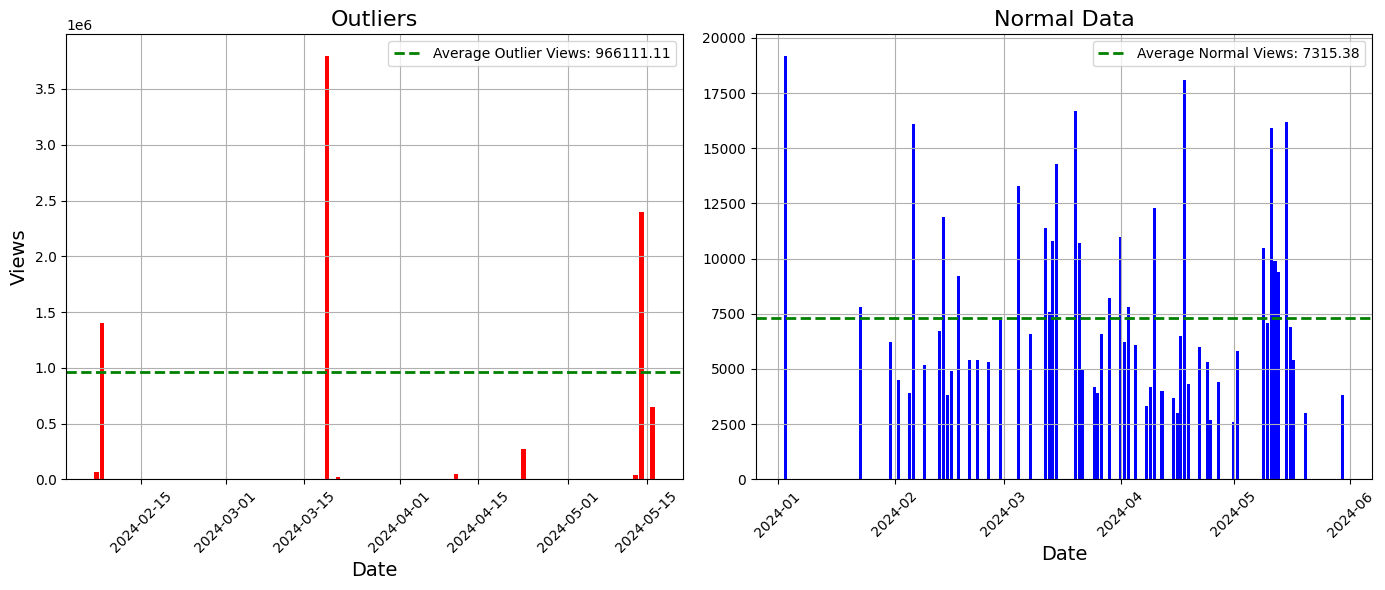

In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

average_outlierviews = df[outliers]['Views'].mean()
average_normalviews = df[normaldata]['Views'].mean()

# Plot outliers
axes[0].bar(df[outliers]['Date'], df[outliers]['Views'], color='red')
axes[0].set_title('Outliers', fontsize=16)
axes[0].set_xlabel('Date', fontsize=14)
axes[0].set_ylabel('Views', fontsize=14)
axes[0].grid(True)
axes[0].axhline(y=average_outlierviews, color='green', linestyle='--', linewidth=2, label=f'Average Outlier Views: {average_outlierviews:.2f}')
axes[0].legend()
# Rotate date labels for better readability
for tick in axes[0].get_xticklabels():
    tick.set_rotation(45)

# Plot normal data
axes[1].bar(df[normaldata]['Date'], df[normaldata]['Views'], color='blue')
axes[1].set_title('Normal Data', fontsize=16)
axes[1].set_xlabel('Date', fontsize=14)
axes[1].grid(True)
axes[1].axhline(y=average_normalviews, color='green', linestyle='--', linewidth=2, label=f'Average Normal Views: {average_normalviews:.2f}')

# Rotate date labels for better readability
for tick in axes[1].get_xticklabels():
    tick.set_rotation(45)

# Show plot
plt.tight_layout()
plt.legend()
plt.show()

lets also graph a box plot of the non-outlier data to get a better understanding of the spread:

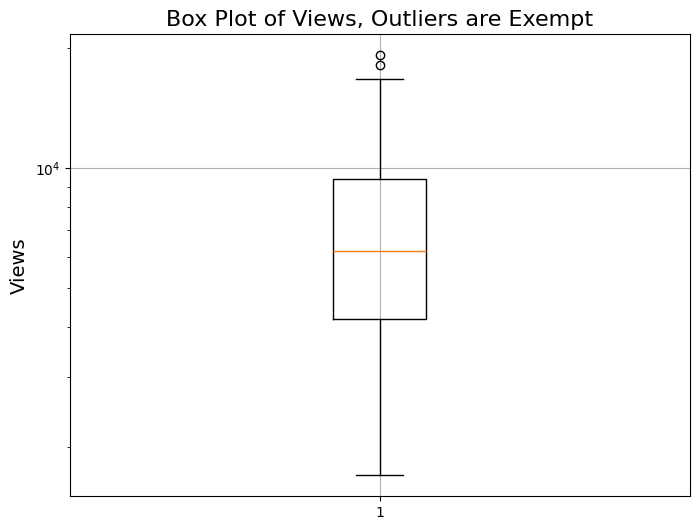

count       65.000000
mean      7315.384615
std       4260.693560
min       1700.000000
25%       4200.000000
50%       6200.000000
75%       9400.000000
max      19200.000000
Name: Views, dtype: float64


In [12]:
# Create a box plot for the 'Views' column
plt.figure(figsize=(8, 6))  # Set figure size
plt.boxplot(df[normaldata]['Views'])

# Formatting
plt.title('Box Plot of Views, Outliers are Exempt', fontsize=16)
plt.ylabel('Views', fontsize=14)
plt.grid(True)
plt.yscale('log')
# Show plot
plt.show()

desc_normstats = df[normaldata]['Views'].describe()
print(desc_normstats)

Compared to a standard deviation of 543,168.7 views (of the overall data), when ignoring the outliers/spikes in views, considering a normal and consistent posting schedule we have a standard deviation of 4304 views, which displays much more stability in our content and viewership.

Lastly, we want to explore the threshold of 10k views as being "viral". Let's now explore our data revolving around content that went viral:

In [13]:
viral = df['Views'] > 10000

viral_percent = viral.sum() / len(df)
print("Percentage of Viral Views:", viral_percent)

Percentage of Viral Views: 0.32432432432432434


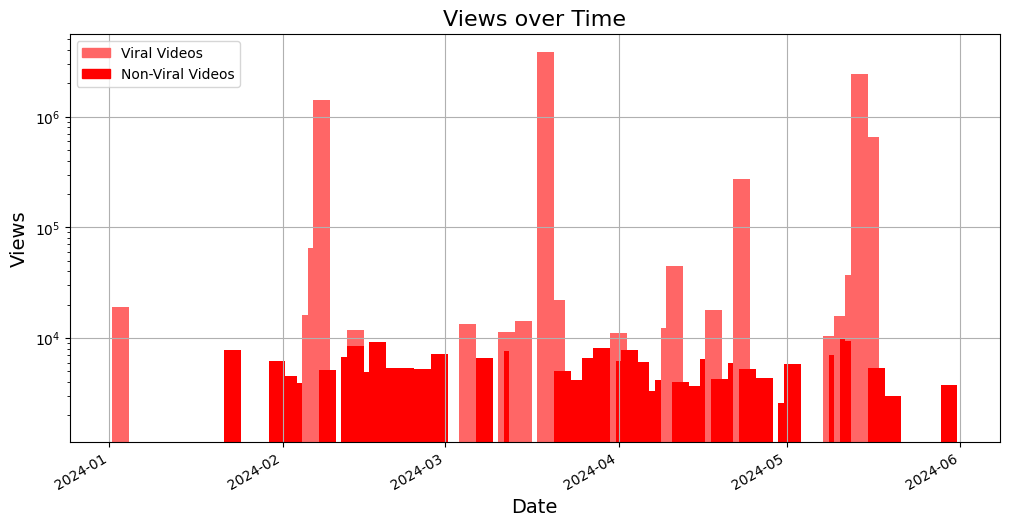

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
colors = ['#FF6666' if is_viral else '#FF0000' for is_viral in viral]

plt.figure(figsize=(12, 6)) 
plt.bar(df['Date'], df['Views'], width=3, color=colors)  

plt.title('Views over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Views', fontsize=14)
plt.grid(True)
plt.gcf().autofmt_xdate()

# Log scale the y-axis
plt.yscale('log')

# Create legend labels
legend_labels = ['Viral Videos', 'Non-Viral Videos']
legend_colors = ['#FF6666', '#FF0000']
legend_patches = [Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
plt.legend(handles=legend_patches, loc='upper left')

plt.show()

### 2) WashU [Views + Likes + Comments + Shares + Saves] V.S. Time

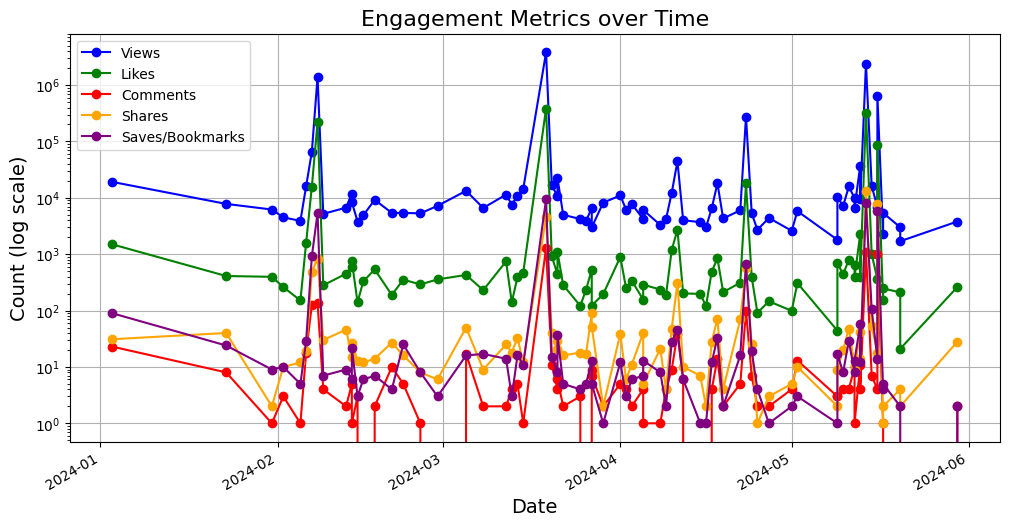

In [15]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot 'Views' vs 'Date'
plt.plot(df['Date'], df['Views'], marker='o', linestyle='-', color='blue', label='Views')

# Plot 'Likes' vs 'Date'
plt.plot(df['Date'], df['Likes'], marker='o', linestyle='-', color='green', label='Likes')

# Plot 'Comments' vs 'Date'
plt.plot(df['Date'], df['Comments'], marker='o', linestyle='-', color='red', label='Comments')

# Plot 'Shares' vs 'Date'
plt.plot(df['Date'], df['Shares'], marker='o', linestyle='-', color='orange', label='Shares')

# Plot 'Saves/Bookmarks' vs 'Date'
plt.plot(df['Date'], df['Saves/Bookmarks'], marker='o', linestyle='-', color='purple', label='Saves/Bookmarks')

# Formatting
plt.title('Engagement Metrics over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count (log scale)', fontsize=14)
plt.grid(True)
plt.yscale('log')  # Log scale for better visualization

# Add legend
plt.legend()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Show plot
plt.show()

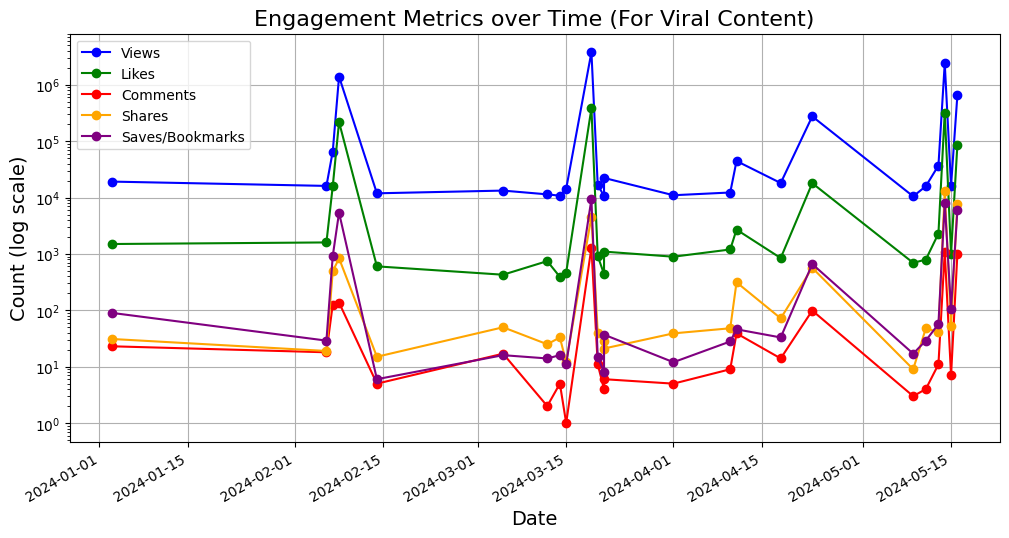

In [16]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot 'Views' vs 'Date'
plt.plot(df[viral]['Date'], df[viral]['Views'], marker='o', linestyle='-', color='blue', label='Views')

# Plot 'Likes' vs 'Date'
plt.plot(df[viral]['Date'], df[viral]['Likes'], marker='o', linestyle='-', color='green', label='Likes')

# Plot 'Comments' vs 'Date'
plt.plot(df[viral]['Date'], df[viral]['Comments'], marker='o', linestyle='-', color='red', label='Comments')

# Plot 'Shares' vs 'Date'
plt.plot(df[viral]['Date'], df[viral]['Shares'], marker='o', linestyle='-', color='orange', label='Shares')

# Plot 'Saves/Bookmarks' vs 'Date'
plt.plot(df[viral]['Date'], df[viral]['Saves/Bookmarks'], marker='o', linestyle='-', color='purple', label='Saves/Bookmarks')

# Formatting
plt.title('Engagement Metrics over Time (For Viral Content)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count (log scale)', fontsize=14)
plt.grid(True)
plt.yscale('log')  # Log scale for better visualization

# Add legend
plt.legend()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Show plot
plt.show()

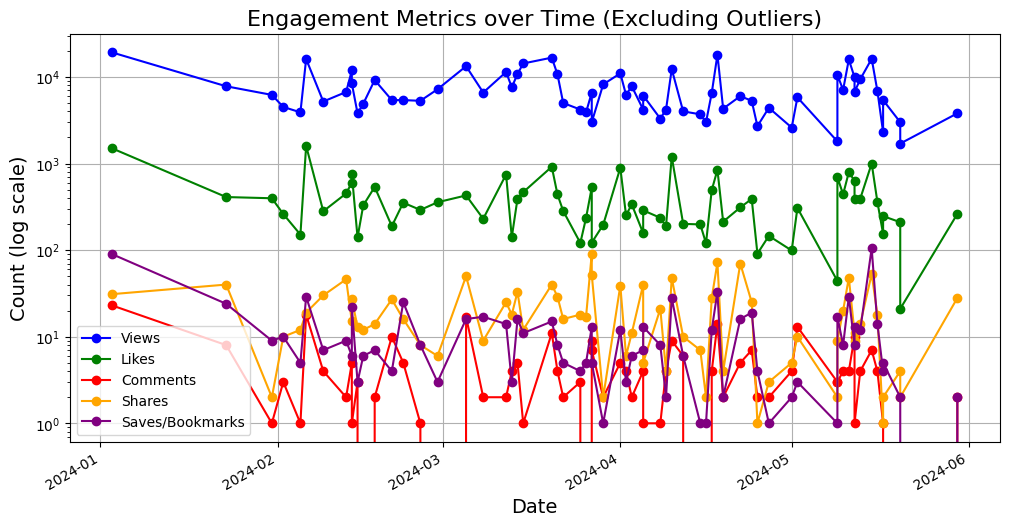

In [17]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot 'Views' vs 'Date'
plt.plot(df[normaldata]['Date'], df[normaldata]['Views'], marker='o', linestyle='-', color='blue', label='Views')

# Plot 'Likes' vs 'Date'
plt.plot(df[normaldata]['Date'], df[normaldata]['Likes'], marker='o', linestyle='-', color='green', label='Likes')

# Plot 'Comments' vs 'Date'
plt.plot(df[normaldata]['Date'], df[normaldata]['Comments'], marker='o', linestyle='-', color='red', label='Comments')

# Plot 'Shares' vs 'Date'
plt.plot(df[normaldata]['Date'], df[normaldata]['Shares'], marker='o', linestyle='-', color='orange', label='Shares')

# Plot 'Saves/Bookmarks' vs 'Date'
plt.plot(df[normaldata]['Date'], df[normaldata]['Saves/Bookmarks'], marker='o', linestyle='-', color='purple', label='Saves/Bookmarks')

# Formatting
plt.title('Engagement Metrics over Time (Excluding Outliers)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count (log scale)', fontsize=14)
plt.grid(True)
plt.yscale('log')  # Log scale for better visualization

# Add legend
plt.legend()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Show plot
plt.show()

Lets explore the percent of viewers who liked the tik toks with the formula: like_percent = likes/views, and then graph that over time.

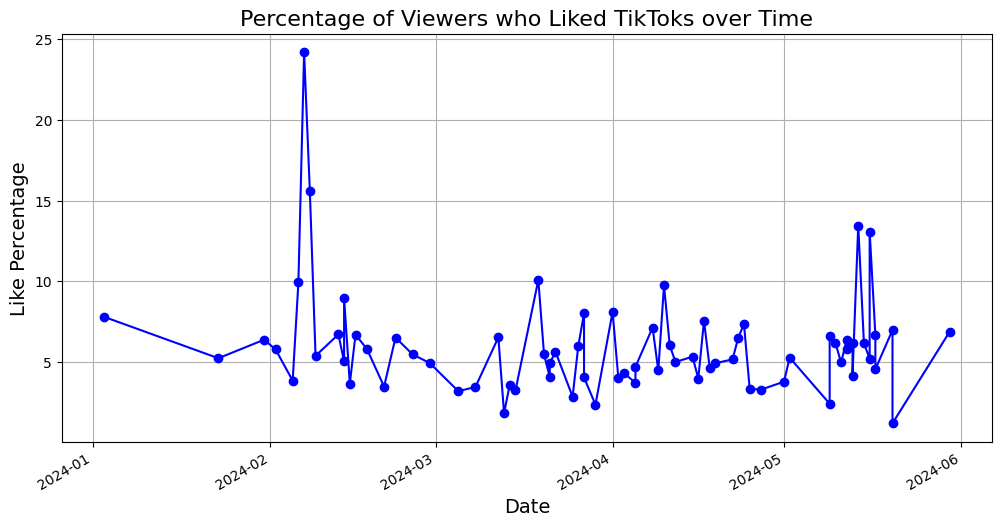

In [18]:
df['Like_Percent'] = df['Likes'] / df['Views'] * 100

# Plot 'Like_Percent' vs 'Date'
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(df['Date'], df['Like_Percent'], marker='o', linestyle='-', color='blue')

# Formatting
plt.title('Percentage of Viewers who Liked TikToks over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Like Percentage', fontsize=14)
plt.grid(True)

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

# Show plot
plt.show()